Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from IPython.display import display
%matplotlib inline

## Importando os dados

Lendo o arquivo BRAS.csv
O arquivo utilizado foi obtido do site football-data.co.uk.

In [2]:
data = pd.read_csv('data/BRA.csv', delimiter = ',')

verificando o head da tabela

**Legenda**

* Country = País do Campeonato
* League = Nome da Liga
* Game_id = Id do jogo
* Season = Temporada
* Date = Data do jogo
* Time = Hora do jogo
* Home = Time da casa
* Home_id = Id do time da casa
* Away = Time visitante
* Away_id = Id do time visitante
* HG = Gols do time da casa
* AG = Gols do time visitante
* Res = Resultado do jogo (D = Draw, H = Home win, A = Away win)
* PH = Probabilidade de vitória do time da casa provida pela Pinacle (casa de aposta inglesa)
* PD = Probabilidade de empate provida pela Pinacle (casa de aposta inglesa)
* PA = Probabilidade de vitória do time visitante provida pela Pinacle (casa de aposta inglesa)
* MaxH = Probabilidade de vitória do time da casa provida pela OddsPortal (casa de aposta inglesa)
* MaxD = Probabilidade de empate provida pela OddsPortal (casa de aposta inglesa)
* MaxA = Probabilidade de vitória do time visitante provida pela OddsPortal (casa de aposta inglesa)
* AvgH = Probabilidade média de vitória do time da casa provida pela OddsPortal (casa de aposta inglesa)
* AvgD = Probabilidade média de empate provida pela OddsPortal (casa de aposta inglesa)
* AvgA = Probabilidade média de vitória do time visitante provida pela OddsPortal (casa de aposta inglesa)

In [7]:
display(data.head())

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


## Explorando os dados

In [10]:
matches = data.shape[0]
features = data.shape[1] - 1 #Desconsiderando a coluna 'resultados'

home_win = len(data[data.Res == 'H'])
away_win = len(data[data.Res == 'A'])
draw = len(data[data.Res == 'D'])
val = [home_win, away_win, draw]

win_rate = (float(home_win) / (matches)) * 100

print('Total de jogos: ', matches)
print('Total de colunas: ', features)
print('Total de jogos ganhos em casa: ', home_win)
print('Total de jogos ganhos fora de casa: ', away_win)
print('Total de jogos empatados: ', draw)
print('Percentual de jogos ganhos em casa: {:.2f}5%'.format(win_rate))

Total de jogos:  3624
Total de colunas:  18
Total de jogos ganhos em casa:  1765
Total de jogos ganhos fora de casa:  882
Total de jogos empatados:  976
Percentual de jogos ganhos em casa: 48.705%


* Nota-se que o "fator casa" é relevante pois quase 50% dos jogos são ganhos pelo time mandante

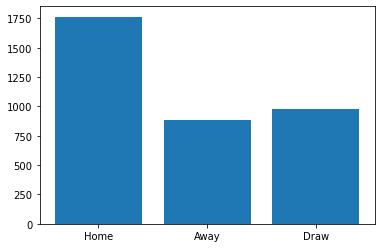

In [12]:
x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Home', 'Away', 'Draw'))
plt.show()

##  Preparando os dados

Atribuir ao campo 'resultado' valores numericos
* H = 1
* A = 2
* D = 0

In [15]:
data.Res.replace({'H': 1, 'D': 0, 'A': 2}, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  3624 non-null   object 
 1   League   3624 non-null   object 
 2   Season   3624 non-null   int64  
 3   Date     3624 non-null   object 
 4   Time     3624 non-null   object 
 5   Home     3624 non-null   object 
 6   Away     3624 non-null   object 
 7   HG       3623 non-null   float64
 8   AG       3623 non-null   float64
 9   Res      3623 non-null   float64
 10  PH       3623 non-null   float64
 11  PD       3623 non-null   float64
 12  PA       3623 non-null   float64
 13  MaxH     3624 non-null   float64
 14  MaxD     3624 non-null   float64
 15  MaxA     3624 non-null   float64
 16  AvgH     3624 non-null   float64
 17  AvgD     3624 non-null   float64
 18  AvgA     3624 non-null   float64
dtypes: float64(12), int64(1), object(6)
memory usage: 538.1+ KB


In [28]:
data.isna().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         1
AG         1
Res        1
PH         1
PD         1
PA         1
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [29]:
data.dropna(inplace = True)

In [30]:
data.isna().sum()

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PH         0
PD         0
PA         0
MaxH       0
MaxD       0
MaxA       0
AvgH       0
AvgD       0
AvgA       0
dtype: int64

In [54]:
data.Res = data.Res.astype('int64')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3623 entries, 0 to 3623
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  3623 non-null   object 
 1   League   3623 non-null   object 
 2   Season   3623 non-null   int64  
 3   Date     3623 non-null   object 
 4   Time     3623 non-null   object 
 5   Home     3623 non-null   object 
 6   Away     3623 non-null   object 
 7   HG       3623 non-null   float64
 8   AG       3623 non-null   float64
 9   Res      3623 non-null   int64  
 10  PH       3623 non-null   float64
 11  PD       3623 non-null   float64
 12  PA       3623 non-null   float64
 13  MaxH     3623 non-null   float64
 14  MaxD     3623 non-null   float64
 15  MaxA     3623 non-null   float64
 16  AvgH     3623 non-null   float64
 17  AvgD     3623 non-null   float64
 18  AvgA     3623 non-null   float64
dtypes: float64(11), int64(2), object(6)
memory usage: 566.1+ KB


In [56]:
data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


Retirar todos os campos não numericos

In [57]:
num_data = data.drop(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away'], 1)

num_data.head()

,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,1.0,1.0,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,1.0,1.0,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,2.0,1.0,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,4.0,2.0,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,0.0,1.0,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


features

In [58]:
features = num_data.drop(['Res'], 1)

labels

In [59]:
labels = num_data['Res']

In [60]:
print('Features\n')
print(features.head())

print('\n\n================\n\n')

print('Labels\n')
print(labels.head())

Features

    HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89




Labels

0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


* Escolhendo as melhores features com KBest

In [63]:
features_list = ('HG', 'AG', 'PH', 'PD', 'PA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA')

k_best_features = SelectKBest(k = 'all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key = lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()

In [66]:
print('Melhores Features')
print(k_best_features_final)

Melhores Features
{'AG': 1204.744540315637, 'PH': 1156.2200751772702, 'PD': 149.53931246619214, 'AvgD': 144.89149889768373, 'MaxH': 131.14403362908072, 'AvgH': 130.14962894831015, 'MaxD': 129.93176788729474, 'MaxA': 68.43861789894387, 'AvgA': 67.77806454475147, 'PA': 66.49379358497326}


* Consderando que nenhuma feature teve um valor de KBest muito baixo, será considerado todos os parâmetros

Features

In [67]:
features = num_data.drop(['Res'], 1)

Labels

In [68]:
labels = num_data.Res

In [74]:
print('Features\n')
print(features.head())

print('\n\n=================================================================\n\n')

print('Labels\n')
print(labels.head())

Features

    HG   AG    PH    PD    PA  MaxH  MaxD  MaxA  AvgH  AvgD  AvgA
0  1.0  1.0  1.75  3.86  5.25  1.76  3.87  5.31  1.69  3.50  4.90
1  1.0  1.0  2.83  3.39  2.68  2.83  3.42  2.70  2.59  3.23  2.58
2  2.0  1.0  1.60  4.04  6.72  1.67  4.05  7.22  1.59  3.67  5.64
3  4.0  2.0  2.49  3.35  3.15  2.49  3.39  3.15  2.35  3.26  2.84
4  0.0  1.0  1.96  3.53  4.41  1.96  3.53  4.41  1.89  3.33  3.89




Labels

0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


## Normalizando os dados de entrada (features)

Gerando novo padrão

In [76]:
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

In [78]:
print('Features: ', features_scale.shape, '\n')
print(features_scale)

Features:  (3623, 11) 

[[0.16666667 0.16666667 0.04036145 ... 0.03235908 0.11913357 0.14746363]
 [0.16666667 0.16666667 0.10542169 ... 0.07933194 0.0866426  0.0562328 ]
 [0.33333333 0.16666667 0.0313253  ... 0.02713987 0.13959085 0.17656311]
 ...
 [0.         0.16666667 0.0246988  ... 0.02035491 0.21901324 0.22532442]
 [0.33333333 0.33333333 0.1439759  ... 0.11951983 0.03489771 0.05112072]
 [0.         0.         0.06084337 ... 0.04958246 0.09025271 0.10460087]]


## Separação em Treinamento e Teste

In [82]:
X_train = features_scale[:3071]
X_test = features_scale[3071:3426]
y_train = labels[:3071]
y_test = labels[3071:3426]

print('Treino')
print(len(X_train), len(y_train))
print('\nTeste')
print(len(X_test), len(y_test))

Treino
3071 3071

Teste
355 355


## treinando e testando modelos

### Regressão Logística

In [87]:
clf_LR = LogisticRegression(multi_class = 'multinomial', max_iter = 2000)
clf_LR.fit(X_train, y_train)
pred_lr = clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr, average = 'micro')
print('Acurácia LogisticRegression: {}'.format(lg_acc))
print('F1 Score: {}'.format(f1_lr))

Acurácia LogisticRegression: 1.0
F1 Score: 1.0


* O modelo apresenta sinais de overfiting

**Testando Hyper Parameters**

In [88]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid)

search.fit(X_train, y_train)
clf = search.best_estimator_
pred = clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'macro')

print('Acurácia LogisticRegression: {}'.format(lg_acc))
print('F1 Score: {}'.format(f1))

print(clf)

Acurácia LogisticRegression: 1.0
F1 Score: 1.0
LogisticRegression(C=10, max_iter=1000)


### SVM

In [89]:
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

svc_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')
print('Acurácia SVC: {}'.format(svc_acc))
print('F1 Score: {}'.format(f1))

Acurácia SVC: 0.9943661971830986
F1 Score: 0.9943661971830986


**Testando Hyper Parameters**

In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

search = GridSearchCV(SVC(max_iter = 1000), param_grid)

search.fit(X_train, y_train)
clf_SVC = search.best_estimator_
pred = clf_SVC.predict(X_test)

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'macro')

print('Acurácia SVC: {}'.format(acc))
print('F1 Score: {}'.format(f1))

print(clf_SVC)

Acurácia SVC: 0.9971830985915493
F1 Score: 0.9972997628170042
SVC(C=10, max_iter=1000)


### Decision Tree

In [93]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')
print('Acurácia Tree: {}'.format(dt_acc))
print('F1 Score: {}'.format(f1))

n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Acurácia Tree: 1.0
F1 Score: 1.0


**Testando Hyper Parameters**

In [94]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train, y_train)
clf = search.best_estimator_
pred = clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')

print('Acurácia Tree: {}'.format(dt_acc))
print('F1 Score: {}'.format(f1))

print(clf)

Acurácia Tree: 0.8450704225352113
F1 Score: 0.8450704225352113
DecisionTreeClassifier(max_depth=90, max_features=3, min_samples_leaf=4,
                       min_samples_split=12)


### Naive Bayes

In [95]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average = 'micro')
print('Acurácia Naive Bayes: {}'.format(nb_acc))
print('F1 Score: {}'.format(f1))

Acurácia Naive Bayes: 0.6338028169014085
F1 Score: 0.6338028169014085


## Executando a previsão

* O modelo de SVM foi o que melhor performou

In [97]:
previsao = features_scale[3426:]

res_full = data.Res
res = res_full[3426:]

clf_svc = SVC()
clf_svc.fit(X_train, y_train)
pred = clf_svc.predict(previsao)

df = pd.DataFrame({'real': res, 'previsao': pred})

print(df)

      real  previsao
3427     2         2
3428     2         2
3429     0         0
3430     1         1
3431     0         0
...    ...       ...
3619     1         1
3620     0         0
3621     2         2
3622     0         0
3623     0         0

[197 rows x 2 columns]


**Matriz de confusão**

<AxesSubplot:xlabel='previsao', ylabel='real'>

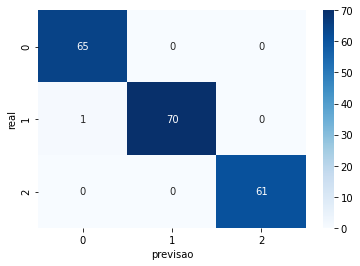

In [98]:
df = pd.DataFrame(df, columns = ['real', 'previsao'])

cf_matrix = pd.crosstab(df.real, df.previsao, rownames=['real'], colnames = ['previsao'])

sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')